In [ ]:
import pandas as pd
from matplotlib import pyplot
from matplotlib import figure
import numpy as np
!pip install datetime
import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

The following graphs are all based on subsetSentencingData

In [ ]:
combined = pd.read_csv('/content/drive/MyDrive/QTM_Capstone_DA_Project/Data_and_Codes/cleanedData.csv')

Discretion: charges positively/ negatively affected for discretion

In [4]:
no_elig = combined[combined['CaseFlag']==False]
pos_effect = no_elig[no_elig['CaseFlagWord']=='CBL']
len(pos_effect)

2502

In [5]:
elig = combined[combined['CaseFlag']==True]
neg_effect = elig[elig['CaseFlagWord']!='CBL']
len(neg_effect)

699032

Recidivism: Find individuals who commits crimes again: felony (eligible to dismiss) -> felony again

In [6]:
recid_df = combined[combined['EarlierArrest']==True]
recid_indv = recid_df['UniquePersonID'].unique().tolist()
total_recid = combined.loc[combined['UniquePersonID'].isin(recid_indv)]

In [7]:
first_commit = total_recid[total_recid['EarlierArrest']==False]
first_commit_elig = first_commit[first_commit['CaseFlag']==True]
benefited_recid_indv = first_commit_elig['UniquePersonID'].tolist()
second_commit_benefited = recid_df.loc[recid_df['UniquePersonID'].isin(benefited_recid_indv)]

In [8]:
#second_commit_benefited_grouped = second_commit_benefited.replace(NaN, {"O"})
second_commit_benefited_grouped = second_commit_benefited.replace({'X'}, {"Others"})
second_commit_benefited_grouped = second_commit_benefited_grouped.replace({'Ordinance'}, {"Others"})
second_commit_benefited_grouped = second_commit_benefited_grouped.replace({'Serious Felony'}, {"Felony"})

In [9]:
benefited_recid = len(second_commit_benefited['UniquePersonID'].unique())/len(recid_df['UniquePersonID'].unique())
benefited_recid

0.26649151864755266

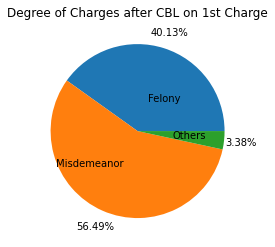

In [10]:
second_commit_benefited_grouped = second_commit_benefited_grouped.groupby('Degree').count()[["Unnamed: 0"]]
count = np.array(second_commit_benefited_grouped)
mylabels = second_commit_benefited_grouped.index.tolist()

pyplot.pie(second_commit_benefited_grouped["Unnamed: 0"], labels = mylabels,autopct='%0.2f%%',pctdistance=1.2,labeldistance=0.4)
pyplot.title('Degree of Charges after CBL on 1st Charge')
pyplot.savefig('Degree of Charges after CBL.png',dpi=300, bbox_inches='tight', transparent=True)
pyplot.show() 

Number of cases applied vs eligible:

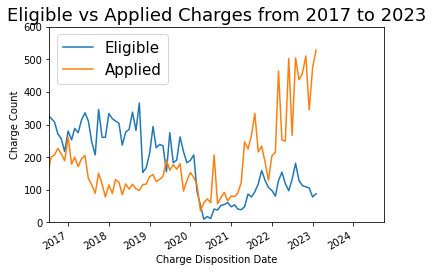

In [11]:
'''
applied cases w.r.t eligible cases
'''
combined['FormattedDispositionDate'] = pd.to_datetime(combined['FormattedDispositionDate'])
combined['month_year'] = combined['FormattedDispositionDate'].dt.to_period('M')
combined['month_year'] = combined['month_year'].astype(str)
combined['month_year'] = pd.to_datetime(combined['month_year'])
combined_elig=combined[combined['CaseFlag']==True]
combined_elig_app = combined_elig.groupby(['PolicyApplied','month_year']).size().reset_index(name='counts')
combined_elig_app.set_index('month_year', inplace=True)
combined_elig_app.groupby('PolicyApplied')['counts'].plot(legend=True)
pyplot.rc('font', size=15)
pyplot.rc('xtick', labelsize=12)
pyplot.rc('ytick', labelsize=12)
pyplot.title('Eligible vs Applied Charges from 2017 to 2023')
pyplot.xlabel('Charge Disposition Date')
pyplot.ylabel('Charge Count')
pyplot.xlim([17000, 20000])
pyplot.ylim([0, 600])
pyplot.legend(['Eligible','Applied'])
pyplot.savefig('applied_vs_elig.png', dpi=300, bbox_inches='tight',transparent=True)
pyplot.show()

Demographic composition graphs: each unique defendant will be counted only once

Plead Guilty:

In [12]:
combined_uniquePerson = combined.drop_duplicates(subset='UniquePersonID', keep='first', inplace=False, ignore_index=False)

In [13]:
combined_uniquePerson_guilty = combined_uniquePerson.loc[combined_uniquePerson['Plea'].isin(['Guilty','Guilty-Negotiated Plea','Guilty of Lesser Included Offense','Guilty-Alford','Guilty but Mentally Ill'])]

In [ ]:
combined_uniquePerson_grouped = combined_uniquePerson_guilty.replace({"M"}, {"Others"})
combined_uniquePerson_grouped = combined_uniquePerson_grouped.replace({"S"}, {"Others"})
combined_uniquePerson_grouped = combined_uniquePerson_grouped.replace({"U"}, {"Others"})
combined_uniquePerson_grouped = combined_uniquePerson_grouped.replace({"I"}, {"Others"})
combined_uniquePerson_grouped = combined_uniquePerson_grouped.replace({"H"}, {"Others"})
combined_uniquePerson_grouped = combined_uniquePerson_grouped.replace({"A"}, {"Others"})
combined_uniquePerson_grouped = combined_uniquePerson_grouped.replace({"O"}, {"Others"})
combined_uniquePerson_grouped = combined_uniquePerson_grouped.replace({"W"}, {"White"})
combined_uniquePerson_grouped = combined_uniquePerson_grouped.replace({"B"}, {"Black"})
combined_uniquePerson_grouped.Race.unique()

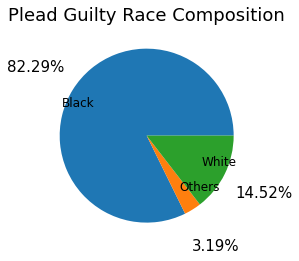

In [15]:
raceCountCombined = combined_uniquePerson_grouped.groupby('Race').count()[["Unnamed: 0"]]
count = np.array(raceCountCombined)
mylabels = raceCountCombined.index.tolist()

pyplot.pie(raceCountCombined["Unnamed: 0"], labels = mylabels,autopct='%0.2f%%',pctdistance=1.5,labeldistance=0.7)
pyplot.title('Plead Guilty Race Composition')
pyplot.savefig('Plead Guilty Race.png',dpi=300, bbox_inches='tight', transparent=True)
pyplot.show() 

Plead Not Guilty:

In [16]:
combined_uniquePerson = combined.drop_duplicates(subset='UniquePersonID', keep='first', inplace=False, ignore_index=False)

In [17]:
combined_uniquePerson_notguilty = combined_uniquePerson.loc[combined_uniquePerson['Plea'].isin(['Nolle Prosequied',
'Dead Docket','Not Presented to Grand Jury', 'Not Guilty by Reason of Insanity', 'Not Guilty', 'Nolo Contendere','Dismissed', 
'Transferred to Another Jurisdiction','Nolo Contendere Lesser Included Offense','Nolo Contendere-Negotiated Plea'])]


In [18]:
combined_uniquePerson_grouped = combined_uniquePerson_notguilty.replace({"M"}, {"Others"})
combined_uniquePerson_grouped = combined_uniquePerson_grouped.replace({"S"}, {"Others"})
combined_uniquePerson_grouped = combined_uniquePerson_grouped.replace({"U"}, {"Others"})
combined_uniquePerson_grouped = combined_uniquePerson_grouped.replace({"I"}, {"Others"})
combined_uniquePerson_grouped = combined_uniquePerson_grouped.replace({"H"}, {"Others"})
combined_uniquePerson_grouped = combined_uniquePerson_grouped.replace({"A"}, {"Others"})
combined_uniquePerson_grouped = combined_uniquePerson_grouped.replace({"O"}, {"Others"})
combined_uniquePerson_grouped = combined_uniquePerson_grouped.replace({"W"}, {"White"})
combined_uniquePerson_grouped = combined_uniquePerson_grouped.replace({"B"}, {"Black"})
combined_uniquePerson_grouped.Race.unique()

array(['Black', 'White', 'Others', nan], dtype=object)

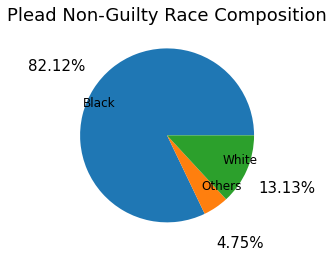

In [19]:
raceCountCombined = combined_uniquePerson_grouped.groupby('Race').count()[["Unnamed: 0"]]
count = np.array(raceCountCombined)
mylabels = raceCountCombined.index.tolist()

pyplot.pie(raceCountCombined["Unnamed: 0"], labels = mylabels,autopct='%0.2f%%',pctdistance=1.5,labeldistance=0.7)
pyplot.title('Plead Non-Guilty Race Composition')
pyplot.savefig('Plead Non-Guilty Race.png',dpi=300, bbox_inches='tight', transparent=True)
pyplot.show() 

Race Decomposition in whole dataset:

In [20]:
combined_uniquePerson = combined.drop_duplicates(subset='UniquePersonID', keep='first', inplace=False, ignore_index=False)

In [21]:
combined_uniquePerson_grouped = combined_uniquePerson.replace({"M"}, {"Others"})
combined_uniquePerson_grouped = combined_uniquePerson_grouped.replace({"S"}, {"Others"})
combined_uniquePerson_grouped = combined_uniquePerson_grouped.replace({"U"}, {"Others"})
combined_uniquePerson_grouped = combined_uniquePerson_grouped.replace({"I"}, {"Others"})
combined_uniquePerson_grouped = combined_uniquePerson_grouped.replace({"H"}, {"Others"})
combined_uniquePerson_grouped = combined_uniquePerson_grouped.replace({"A"}, {"Others"})
combined_uniquePerson_grouped = combined_uniquePerson_grouped.replace({"R"}, {"Others"})
combined_uniquePerson_grouped = combined_uniquePerson_grouped.replace({"E"}, {"Others"})
combined_uniquePerson_grouped = combined_uniquePerson_grouped.replace({"O"}, {"Others"})
combined_uniquePerson_grouped = combined_uniquePerson_grouped.replace({"W"}, {"White"})
combined_uniquePerson_grouped = combined_uniquePerson_grouped.replace({"B"}, {"Black"})
combined_uniquePerson_grouped.Race.unique()

array(['White', 'Black', nan, 'Others'], dtype=object)

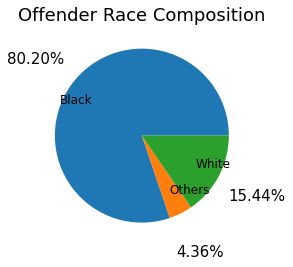

In [22]:
raceCountCombined = combined_uniquePerson_grouped.groupby('Race').count()[["Unnamed: 0"]]
count = np.array(raceCountCombined)
mylabels = raceCountCombined.index.tolist()

pyplot.pie(raceCountCombined["Unnamed: 0"], labels = mylabels,autopct='%0.2f%%',pctdistance=1.5,labeldistance=0.7)
pyplot.title('Offender Race Composition')
pyplot.savefig('Offender Race.png',dpi=300, bbox_inches='tight', transparent=True)
pyplot.show() 